
Enter Image Index (0 - 194795)44
True Domain: tensor([1, 0], device='cuda:0'), Predicted Domain: tensor([[-0.7026, -0.6838]], device='cuda:0')


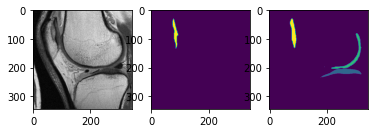


Enter Image Index (0 - 194795)80
True Domain: tensor([1, 0], device='cuda:0'), Predicted Domain: tensor([[-0.7026, -0.6838]], device='cuda:0')


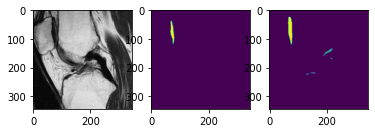


Enter Image Index (0 - 194795)99
True Domain: tensor([1, 0], device='cuda:0'), Predicted Domain: tensor([[-0.7026, -0.6838]], device='cuda:0')


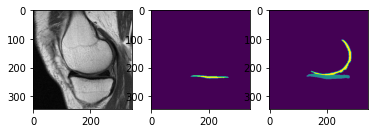


Enter Image Index (0 - 194795)100
True Domain: tensor([1, 0], device='cuda:0'), Predicted Domain: tensor([[-0.7026, -0.6838]], device='cuda:0')


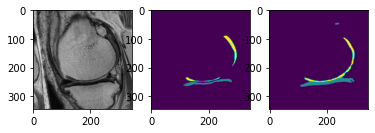


Enter Image Index (0 - 194795)1001
True Domain: tensor([1, 0], device='cuda:0'), Predicted Domain: tensor([[-0.7026, -0.6838]], device='cuda:0')


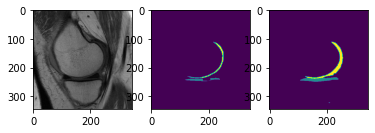

In [ ]:
from model import DAVNet2D
from dataset import *
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import numpy as np
import sys
import os
import torch

PATH = '/data/bigbone6/skamat/checkpoints-davnet/20210213-100646-1.pt'
os.environ['CUDA_VISIBLE_DEVICES'] = '1,2'
model = DAVNet2D(4, dp=True).cuda()

checkpoint = torch.load(PATH, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

data = kMRI('train', balanced=False, group='source')

while True:
    print()
    i = int(input('Enter Image Index (0 - {})'.format(len(data) - 1)))
    image, segmentation, domain = data[i]
    image, segmentation, domain = image.cuda(), segmentation.cuda(), domain.cuda()
    with torch.no_grad():
        seg_pred, dom_pred = model(image.view(1, 1, 344, 344), 0, False)
    image = image.view(344, 344).cpu().numpy()
    seg_pred = seg_pred.view(-1, 344, 344).argmax(0).cpu().numpy()
    segmentation = segmentation.view(-1, 344, 344).argmax(0).cpu().numpy()
    print("True Domain: {}, Predicted Domain: {}".format(domain, dom_pred))
    dom_pred = dom_pred.argmax(-1).view(-1)[0].item()
    domain = domain.view(-1)[0].item()

    #print("True Domain: {}, Predicted Domain: {}".format(domain, dom_pred))

    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(image, cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(segmentation)
    f.add_subplot(1,3, 3)
    plt.imshow(seg_pred)

    plt.show()